In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Train_Data.csv')

In [ ]:
df.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win
0,d,3,f,5,a,5,nine
1,d,3,e,5,f,2,eight
2,d,1,g,6,d,7,thirteen
3,c,2,e,8,a,4,ten
4,d,4,a,8,b,1,eight


In [ ]:
df['optimal depth-of-win'].value_counts()

fourteen    3414
thirteen    3145
twelve      2698
eleven      2141
draw        2097
fifteen     1625
ten         1489
nine        1284
eight       1075
seven        512
six          444
five         353
sixteen      293
two          184
four         148
three         61
one           58
zero          20
Name: optimal depth-of-win, dtype: int64

In [ ]:
df.isnull().sum()

White King file         0
White King rank         0
White Rook file         0
White Rook rank         0
Black King file         0
Black King rank         0
optimal depth-of-win    0
dtype: int64

In [ ]:
df.corr()

,White King rank,White Rook rank,Black King rank
White King rank,1.000000,-0.014207,-0.128245
White Rook rank,-0.014207,1.000000,-0.024469
Black King rank,-0.128245,-0.024469,1.000000


In [ ]:
df['White King file'].unique()

array(['d', 'c', 'a', 'b'], dtype=object)

In [ ]:
for cols in df:
  print(cols)
  print(df[cols].unique())

White King file
['d' 'c' 'a' 'b']
White King rank
[3 1 2 4]
White Rook file
['f' 'e' 'g' 'a' 'c' 'h' 'd' 'b']
White Rook rank
[5 6 8 4 7 2 3 1]
Black King file
['a' 'f' 'd' 'b' 'h' 'g' 'e' 'c']
Black King rank
[5 2 7 4 1 3 8 6]
optimal depth-of-win
['nine' 'eight' 'thirteen' 'ten' 'eleven' 'fifteen' 'fourteen' 'draw'
 'twelve' 'three' 'seven' 'one' 'four' 'six' 'two' 'five' 'sixteen' 'zero']


In [ ]:
yes_no_columns = ['White Rook file','Black King file']
for col in yes_no_columns:
    df[col].replace({'a': 1,'b': 2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8},inplace=True)

In [ ]:
for cols in df:
  print(cols)
  print(df[cols].unique())

White King file
['d' 'c' 'a' 'b']
White King rank
[3 1 2 4]
White Rook file
[6 5 7 1 3 8 4 2]
White Rook rank
[5 6 8 4 7 2 3 1]
Black King file
[1 6 4 2 8 7 5 3]
Black King rank
[5 2 7 4 1 3 8 6]
optimal depth-of-win
['nine' 'eight' 'thirteen' 'ten' 'eleven' 'fifteen' 'fourteen' 'draw'
 'twelve' 'three' 'seven' 'one' 'four' 'six' 'two' 'five' 'sixteen' 'zero']


In [ ]:
df['White King file'].replace({'d':4,'c':3,'b':2,'a':1},inplace=True)

In [ ]:
for cols in df:
  print(cols)
  print(df[cols].unique())

White King file
[4 3 1 2]
White King rank
[3 1 2 4]
White Rook file
[6 5 7 1 3 8 4 2]
White Rook rank
[5 6 8 4 7 2 3 1]
Black King file
[1 6 4 2 8 7 5 3]
Black King rank
[5 2 7 4 1 3 8 6]
optimal depth-of-win
['nine' 'eight' 'thirteen' 'ten' 'eleven' 'fifteen' 'fourteen' 'draw'
 'twelve' 'three' 'seven' 'one' 'four' 'six' 'two' 'five' 'sixteen' 'zero']


In [ ]:
df

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank,optimal depth-of-win
0,4,3,6,5,1,5,nine
1,4,3,5,5,6,2,eight
2,4,1,7,6,4,7,thirteen
3,3,2,5,8,1,4,ten
4,4,4,1,8,2,1,eight
...,...,...,...,...,...,...,...
21036,4,3,4,1,4,6,twelve
21037,4,3,6,4,1,3,five
21038,2,1,8,4,8,1,ten
21039,3,1,8,7,3,5,fourteen


In [ ]:
X = df.drop(['optimal depth-of-win'],axis=1)

In [ ]:
y = df['optimal depth-of-win']

In [ ]:
X

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank
0,4,3,6,5,1,5
1,4,3,5,5,6,2
2,4,1,7,6,4,7
3,3,2,5,8,1,4
4,4,4,1,8,2,1
...,...,...,...,...,...,...
21036,4,3,4,1,4,6
21037,4,3,6,4,1,3
21038,2,1,8,4,8,1
21039,3,1,8,7,3,5


In [ ]:
y

0            nine
1           eight
2        thirteen
3             ten
4           eight
           ...   
21036      twelve
21037        five
21038         ten
21039    fourteen
21040      twelve
Name: optimal depth-of-win, Length: 21041, dtype: object

In [ ]:
y.replace({'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12,'thirteen':13,'fourteen':14,'fifteen':15,'sixteen':16,'draw':17},inplace=True)

In [ ]:
y.value_counts()

14    3414
13    3145
12    2698
11    2141
17    2097
15    1625
10    1489
9     1284
8     1075
7      512
6      444
5      353
16     293
2      184
4      148
3       61
1       58
0       20
Name: optimal depth-of-win, dtype: int64

In [ ]:
# !pip install imbalanced-learn
  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

# scaler = StandardScaler()


cols_to_scale = ['White King file','White King rank','White Rook file','White Rook rank','Black King file','Black King rank']



X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [ ]:
X.head()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank
0,1.000000,0.666667,0.714286,0.571429,0.000000,0.571429
1,1.000000,0.666667,0.571429,0.571429,0.714286,0.142857
2,1.000000,0.000000,0.857143,0.714286,0.428571,0.857143
3,0.666667,0.333333,0.571429,1.000000,0.000000,0.428571
4,1.000000,1.000000,0.000000,1.000000,0.142857,0.000000


In [ ]:
X.corr()

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank
White King file,1.000000,0.454398,-0.014393,0.002862,-0.136801,0.099432
White King rank,0.454398,1.000000,0.002117,-0.014207,0.102839,-0.128245
White Rook file,-0.014393,0.002117,1.000000,-0.009978,-0.017262,0.006583
White Rook rank,0.002862,-0.014207,-0.009978,1.000000,0.002253,-0.024469
Black King file,-0.136801,0.102839,-0.017262,0.002253,1.000000,-0.072938
Black King rank,0.099432,-0.128245,0.006583,-0.024469,-0.072938,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15, stratify=y)

In [ ]:
X_train.shape

(15780, 6)

In [ ]:
X_test.shape

(5261, 6)

In [ ]:


y_train.shape

(15780,)

In [ ]:
y_test.shape

(5261,)

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import f1_score


In [ ]:
predictions

[14,
 2,
 17,
 6,
 17,
 8,
 11,
 14,
 14,
 13,
 14,
 13,
 11,
 9,
 13,
 13,
 14,
 14,
 10,
 17,
 10,
 14,
 12,
 13,
 15,
 1,
 15,
 8,
 15,
 17,
 13,
 12,
 8,
 9,
 12,
 13,
 11,
 14,
 8,
 14,
 14,
 13,
 13,
 10,
 14,
 12,
 12,
 14,
 11,
 14,
 10,
 13,
 17,
 10,
 15,
 15,
 10,
 11,
 17,
 12,
 4,
 7,
 13,
 15,
 13,
 13,
 13,
 12,
 13,
 12,
 14,
 11,
 7,
 8,
 10,
 17,
 17,
 13,
 5,
 11,
 15,
 15,
 12,
 9,
 14,
 11,
 9,
 14,
 11,
 16,
 13,
 17,
 11,
 11,
 9,
 14,
 13,
 9,
 14,
 17,
 14,
 15,
 11,
 17,
 17,
 11,
 11,
 13,
 14,
 8,
 17,
 13,
 10,
 11,
 14,
 14,
 8,
 15,
 13,
 10,
 13,
 11,
 13,
 11,
 13,
 10,
 9,
 12,
 10,
 14,
 13,
 13,
 12,
 6,
 12,
 13,
 13,
 14,
 17,
 13,
 12,
 11,
 17,
 10,
 17,
 10,
 15,
 15,
 13,
 11,
 11,
 1,
 6,
 15,
 12,
 12,
 14,
 14,
 5,
 4,
 11,
 15,
 10,
 17,
 17,
 8,
 15,
 12,
 10,
 12,
 12,
 14,
 17,
 15,
 7,
 12,
 14,
 10,
 12,
 17,
 11,
 14,
 14,
 12,
 15,
 8,
 17,
 12,
 16,
 9,
 14,
 13,
 9,
 12,
 11,
 14,
 8,
 15,
 11,
 11,
 9,
 6,
 17,
 15,
 6,
 11,
 12,


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 81.81%


In [ ]:
from sklearn.metrics import f1_score


In [ ]:
f1 = f1_score(y_test, predictions,average='macro')
print("f1 Score: %.2f%%" % (f1 * 100.0))


f1 Score: 83.52%


In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[  3,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   1],
       [  0,  14,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,  45,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   2,  12,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  32,   3,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   1,  79,   4,   2,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   4,  86,  16,   2,   1,   0,   1,   0,
          0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   3, 103,  13,   5,   0,   2,   0,
          0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0,   0,   3,   7, 225,  23,   5,   4,   0,
          1,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   3,

Text(159.0, 0.5, 'Truth')

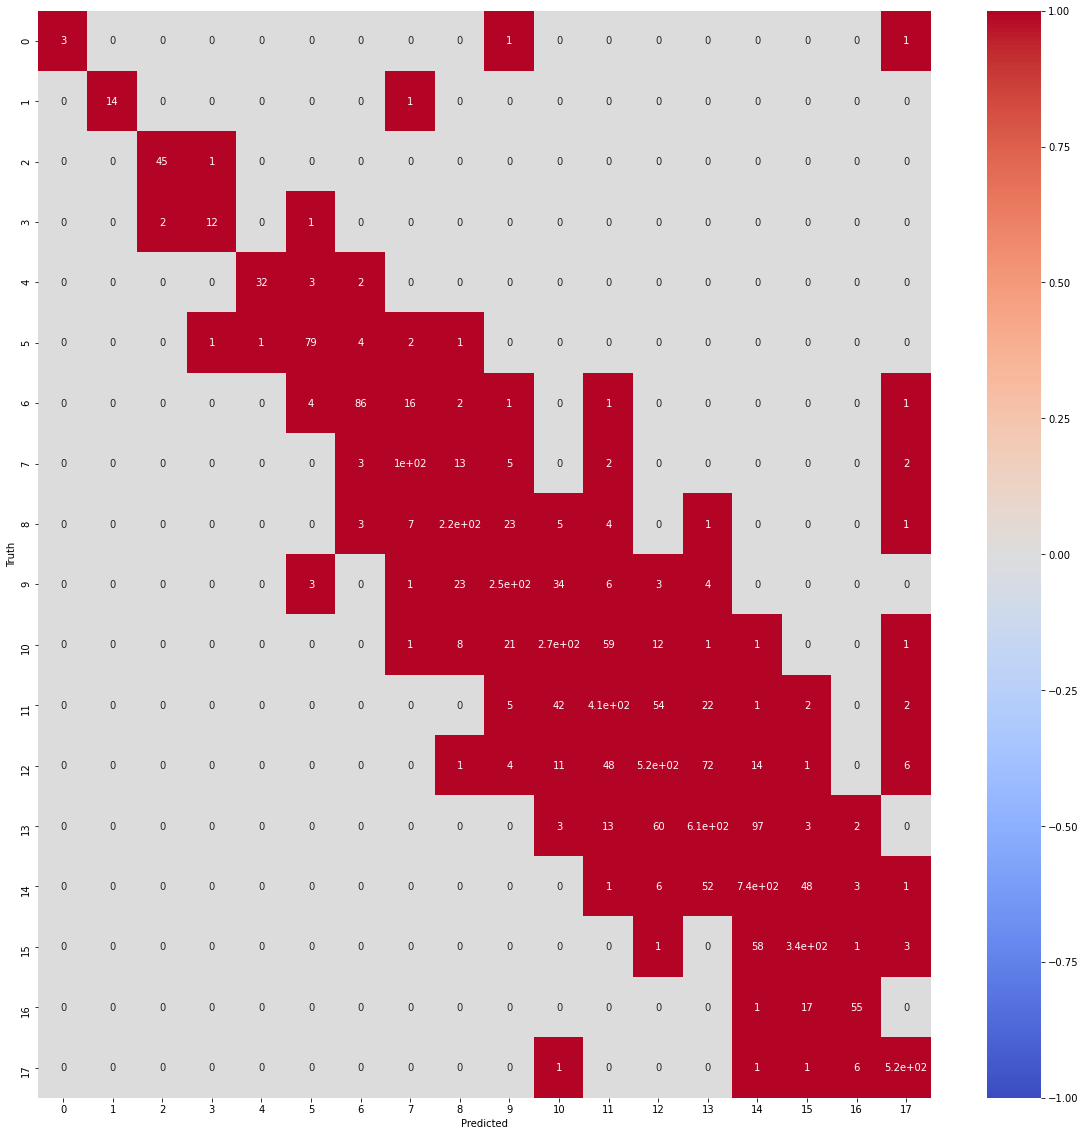

In [ ]:
import seaborn as sn
plt.figure(figsize = (20,20))
sn.heatmap(cm, annot=True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
test_data = pd.read_csv('/content/Test_Data.csv')
test_data.head()

for col in yes_no_columns:
    test_data[col].replace({'a': 1,'b': 2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8},inplace=True)
test_data['White King file'].replace({'d':4,'c':3,'b':2,'a':1},inplace=True)

test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])

In [ ]:
test_data

,White King file,White King rank,White Rook file,White Rook rank,Black King file,Black King rank
0,1.00,0.00,0.57,0.29,0.86,0.57
1,0.33,0.00,0.71,0.86,0.71,0.29
2,1.00,0.33,0.43,0.43,0.57,0.86
3,0.67,0.33,0.86,0.57,0.71,0.57
4,0.33,0.00,0.57,0.43,0.14,1.00
...,...,...,...,...,...,...
7010,0.00,0.00,0.14,0.14,1.00,0.29
7011,0.67,0.33,0.00,0.57,0.57,1.00
7012,0.67,0.00,0.29,0.29,0.43,0.29
7013,0.67,0.67,1.00,0.57,0.71,0.29


In [ ]:
test_data = pd.read_csv('/content/Test_Data.csv')
test_data.head()

for col in yes_no_columns:
    test_data[col].replace({'a': 1,'b': 2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8},inplace=True)
test_data['White King file'].replace({'d':4,'c':3,'b':2,'a':1},inplace=True)

test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])


target = model.predict(test_data)
res = pd.DataFrame(target)

res.columns = ["prediction"]

res.replace({0:"zero",1:"one",2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight',9:'nine',10:'ten',11:'eleven',12:'twelve',13:'thirteen',14:'fourteen',15:'fifteen',16:'sixteen',17:'draw'},inplace=True)


res.to_csv("submission.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.


# es.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
res.columns = ["prediction"]

In [ ]:
res

,prediction
0,thirteen
1,fifteen
2,twelve
3,draw
4,twelve
...,...
7010,fourteen
7011,twelve
7012,draw
7013,eleven


In [ ]:
res.replace({0:"zero",1:"one",2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight',9:'nine',10:'ten',11:'eleven',12:'twelve',13:'thirteen',14:'fourteen',15:'fifteen',16:'sixteen',17:'draw'},inplace=True)

In [ ]:
res

,prediction
0,thirteen
1,fifteen
2,twelve
3,draw
4,twelve
...,...
7010,fourteen
7011,twelve
7012,draw
7013,eleven


In [ ]:
res.to_csv("submission.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.

In [ ]:
# es.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
# Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished



 Time taken: 0 hours 2 minutes and 34.62 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 3}

In [ ]:

# fit model no training data
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)











model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import f1_score


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.85%


In [ ]:
f1 = f1_score(y_test, predictions,average='macro')
print("f1 Score: %.2f%%" % (f1 * 100.0))



f1 Score: 83.95%


In [ ]:
test_data = pd.read_csv('/content/Test_Data.csv')
test_data.head()

for col in yes_no_columns:
    test_data[col].replace({'a': 1,'b': 2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8},inplace=True)
test_data['White King file'].replace({'d':4,'c':3,'b':2,'a':1},inplace=True)

test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])


target = model.predict(test_data)
res = pd.DataFrame(target)

res.columns = ["prediction"]

res.replace({0:"zero",1:"one",2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight',9:'nine',10:'ten',11:'eleven',12:'twelve',13:'thirteen',14:'fourteen',15:'fifteen',16:'sixteen',17:'draw'},inplace=True)


res.to_csv("submission.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.


# es.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>